In [1]:
import pandas as pd  
import numpy as npb  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
 
 
df=pd.read_csv('Social_Network_Ads.csv') 
print(df.columns) 
X=df[['Age','EstimatedSalary']] 
y = df['Purchased'] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42) 
 
models=[]
models.append(LogisticRegression()) 
models.append(KNeighborsClassifier()) 
models.append(DecisionTreeClassifier()) 
model_list=['Logistic','KNN','DecisonTree'] 
acc_list =[] 
cm_list=[] 
 
for model in models: 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    acc_list.append(accuracy_score(y_test,y_pred)) 
    cm_list.append(confusion_matrix(y_test,y_pred)) 
 
result_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list}) 
print(result_df) 

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')
         Model  Accuracy
0     Logistic  0.833333
1          KNN  0.833333
2  DecisonTree  0.871212


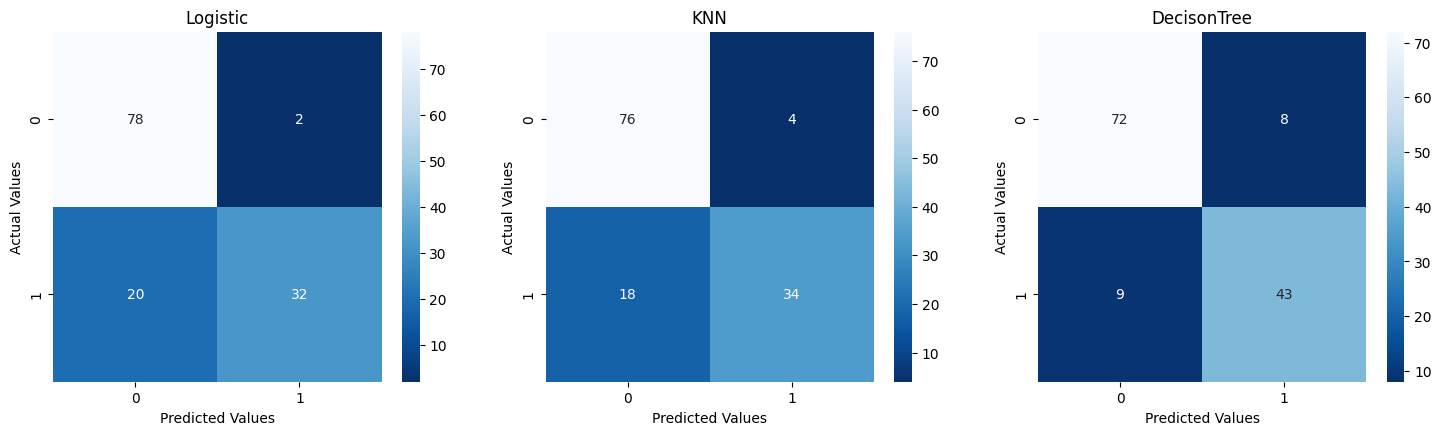

In [3]:
fig=plt.figure(figsize=(18,10)) 
for i in range(len(cm_list)): 
    cm = cm_list[i]
    model=model_list[i] 
    sub = fig.add_subplot(2,3, i+1).set_title(model) 
    cm_plot=sns.heatmap(cm,annot=True,cmap='Blues_r') 
    cm_plot.set_xlabel('Predicted Values') 
    cm_plot.set_ylabel('Actual Values')